# Revolutionizing Insurance Claim Estimation with Machine Learning

**Problem Statement:**

In the era of data-driven decision-making, insurance companies strive to enhance their claim estimation process by leveraging the power of machine learning. The challenge at hand is to develop an innovative and robust machine learning model, that accurately predicts insurance claim amounts for individuals based on a comprehensive set of demographic and contextual factors. By effectively harnessing data on demographics (age, gender, BMI, blood pressure, and number of children), lifestyle habits (smoking status), geographical considerations (region), this model aims to revolutionize claim estimation, enabling insurance companies to streamline operations, optimize resource allocation, and provide fair compensation.

**Data:**

The dataset consists of 1,340 observations with the following variables:

- age: Age of the insured individual (integer)
- gender: Gender of the insured individual (categorical: male, female)
- bmi: Body Mass Index (float)
- children: Number of children the insured individual has (integer)
- smoker: Smoking status of the insured individual (categorical: smoker, non-smoker)
- region: Geographic region of the insured individual (categorical: northeast, southeast, southwest, northwest)
- claim: Actual insurance claim amount (float)

**Approach**

We will incoporate the The OSEMN approach which is a popular framework used in data science and data analysis projects. It provides a systematic and structured workflow to guide the process of working with data from start to finish. OSEMN stands for Obtain, Scrub, Explore, Model, and iNterpret, representing the key stages involved in a typical data science project.

- **Obtain:** We will acquire the insurance claim dataset containing information on demographics, contextual factors, and claim amounts. Understand the data sources, formats, and any potential limitations or biases in the dataset. Load the dataset into jupyter notebook for analysis

- **Scrub:** Perform data cleaning tasks, including handling missing values, correcting inconsistent entries, and addressing outliers. Validate the integrity of the dataset and ensure it aligns with the project's requirements. Conduct exploratory data analysis (EDA) to gain insights into the distribution, correlations, and potential issues within the dataset.

- **Explore:** Conduct a comprehensive analysis of the dataset, visualizing and summarizing the variables of interest. Identify patterns, trends, and relationships between demographic factors, contextual variables, and claim amounts. Perform statistical analyses, such as correlation analysis and hypothesis testing, to uncover significant associations.

- **Modeling:** we will prepare the dataset for modeling by encoding categorical variables, normalizing numerical variables, and splitting it into training and testing sets. Select appropriate machine learning algorithms suited for predicting claim amounts, such as regression models (e.g., linear regression, random forest regression) or deep learning models. Train the selected models on the training set, tuning hyperparameters as needed to optimize performance. Evaluate the trained models using appropriate evaluation metrics, considering factors like mean squared error (MSE) or mean absolute error (MAE). Select the best-performing model based on evaluation results and its ability to generalize to unseen data.

- **iNterpret:** Analyze the coefficients or feature importance of the chosen model to understand the impact of different variables on claim amounts. Interpret the model's predictions, identifying the demographic and contextual factors that significantly influence claim amounts. Validate the model's interpretations through domain knowledge and consultation with subject matter experts.


#### Importing-Libraries-and-Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats, optimize, interpolate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

## Obtain
In this stage, the focus is on acquiring the necessary data for analysis. This involves identifying relevant data sources, collecting or accessing the data, and loading it into a suitable data analysis environment. Understanding the data sources and any potential limitations or biases is crucial at this stage.

In [2]:
# Load the csv data file into a pandas DataFrame
file_path = 'insurance_data.csv'
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Scrub
In the scrub stage, the emphasis is on data cleaning and preparation. This involves addressing missing values, handling outliers, correcting inconsistencies, and ensuring data integrity. Data cleaning tasks aim to create a high-quality dataset suitable for analysis, modeling, and interpretation.

In [3]:
# Checking the the number of columns and rows of the data 

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 1340 rows and 11 columns in the dataset.


The data has 11 columns. The index column and default pandas index are the same. Hence index is dropped.

In [4]:
# Drop index
df.drop('index' ,inplace = True, axis = 1)
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
# Calculate the number and percentage of missing values for all columns
missing_values_count = df.isnull().sum()
missing_values_pct = round((missing_values_count / len(df)) * 100, 2)

# Create a new DataFrame with the results
result_df = pd.DataFrame({
    'Num Missing Values': missing_values_count,
    'Pct Missing Values': missing_values_pct
})

# Display the results
display(result_df)

,Num Missing Values,Pct Missing Values
PatientID,0,0.00
age,5,0.37
gender,0,0.00
bmi,0,0.00
bloodpressure,0,0.00
diabetic,0,0.00
children,0,0.00
smoker,0,0.00
region,3,0.22
claim,0,0.00


There are insignificant number of missing in the age and region columns 

In [7]:
df.dropna(axis = 0, inplace = True)

Some data types are not in the correct format. Patient ID should be an object and age should be integer

In [8]:
#converting the patient ID and age column to the correct datatype 
df['PatientID'] = df['PatientID'].astype(object)
df['age'] = df['age'].astype(int)

In [9]:
#descriptive statistics of the numerical variables 
df.describe()

,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.086336,30.658333,94.189189,1.099850,13325.246426
std,11.112804,6.118967,11.445173,1.205958,12109.620712
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,47.000000,34.725000,99.000000,2.000000,16781.327500
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [10]:
# check for duplicates

df.duplicated().sum()

0

In [11]:
#descriptive statistics of categorical variables 
df.describe(include = 'object')

,PatientID,gender,diabetic,smoker,region
count,1332,1332,1332,1332,1332
unique,1332,2,2,2,4
top,1,male,No,No,southeast
freq,1,670,695,1058,442


In [12]:
# checking for the unique labels in each of the categorical variables 
categorical_variables = ['gender', 'diabetic', 'smoker', 'region']

for variable in categorical_variables:
    unique_labels = df[variable].unique()
    print(f"Unique labels in {variable}: {unique_labels}")


Unique labels in gender: ['male' 'female']
Unique labels in diabetic: ['Yes' 'No']
Unique labels in smoker: ['No' 'Yes']
Unique labels in region: ['southeast' 'northwest' 'southwest' 'northeast']


There are no inconsistencies in the variables. good to go

Number of outliers in age: 0


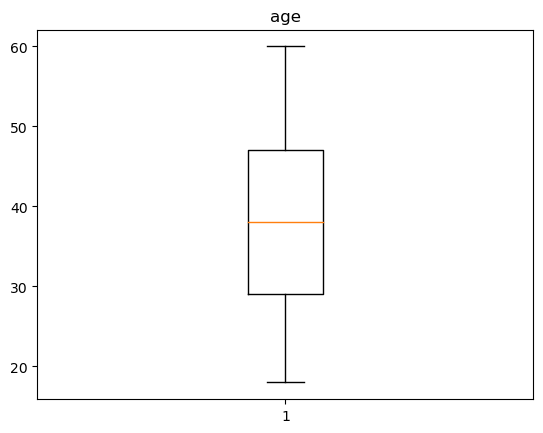

Number of outliers in bmi: 7


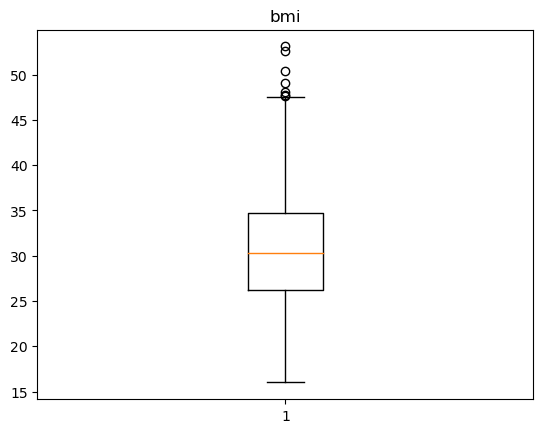

Number of outliers in children: 0


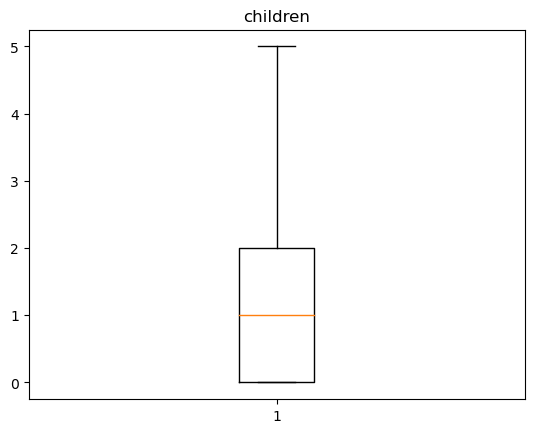

Number of outliers in claim: 135


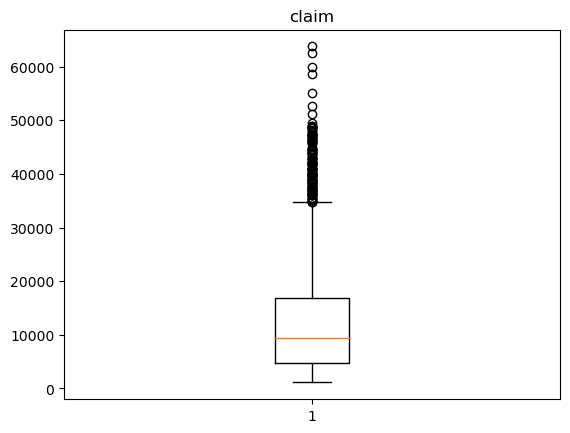

In [13]:
#checking for outliers 
import matplotlib.pyplot as plt

numerical_variables = ['age', 'bmi', 'children', 'claim']

for variable in numerical_variables:
    # Calculate the IQR
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    # Print the number of outliers
    print(f"Number of outliers in {variable}: {len(outliers)}")

    # Create a box plot to visualize the distribution and outliers
    plt.figure()
    plt.boxplot(df[variable])
    plt.title(variable)
    plt.show()


There data seems to be free from outliers. The outliers in the target variable and bmi fall around the whiskers of the box plot, indicating that they are not extreme or influential in a significant way. Therefore, it is deemed appropriate to leave them as they are without any further treatment.

## Explore 
The explore stage involves thoroughly analyzing and understanding the data. Exploratory data analysis (EDA) techniques are applied to uncover patterns, relationships, and insights within the dataset. Visualization and statistical analysis help to identify trends, correlations, and potential issues that may guide subsequent modeling decisions.

#### Univariate Analysis 
Univariate analysis is a statistical method that focuses on examining and understanding individual variables in isolation. It aims to uncover patterns, distributions, and summary statistics within a single variable, without considering the influence or relationship with other variables.

In [14]:
#Inspecting and exploring various columns of the data
categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

In [15]:
# Iterate all numerical Variables in the data
for col in numerical_var.columns:
    print(col)

age
bmi
bloodpressure
children
claim


In [16]:
def explor_numerical_var(data, x) :
    
    """ To return the numerical and graphical summary of 
    numerical variables by taking df and x as argument """
        
    print("Summary statistics \n")
    print(df[x].apply([len, min, max, np.mean, np.median, np.std]))
    print("=================================================")
    print(f"Missing values: {df[x].isnull().sum()}")
    print("==================================================")
    plt.figure(figsize = (8, 4))
    #Plot a box plot
    meanpointdrop = dict(marker = "D", markeredgecolor ="black", markerfacecolor ="firebrick")
    medianprops = dict(linestyle ="-.", linewidth = 3, color="gold")
    plt.subplot(1,2,1)
    plt.boxplot(df[x], vert = True, patch_artist = True, notch = True,
            showmeans = True, medianprops = medianprops, meanprops = meanpointdrop)
    plt.xlabel(df[x].name)
    plt.title("Boxplot")

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x], bins = 10)
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()

Summary statistics 

len       1332.000000
min         16.000000
max         53.100000
mean        30.658333
median      30.350000
std          6.118967
Name: bmi, dtype: float64
Missing values: 0


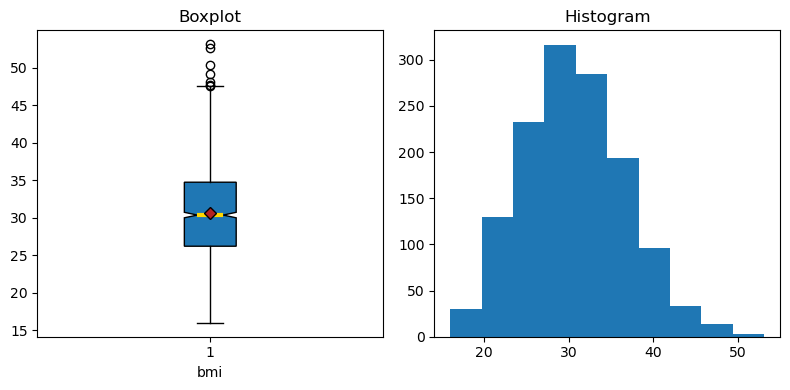

In [17]:
# Call the "explore_numerical_var" function and to explore the bmi variable

explor_numerical_var(df, 'bmi')

Summary statistics 

len       1332.000000
min         18.000000
max         60.000000
mean        38.086336
median      38.000000
std         11.112804
Name: age, dtype: float64
Missing values: 0


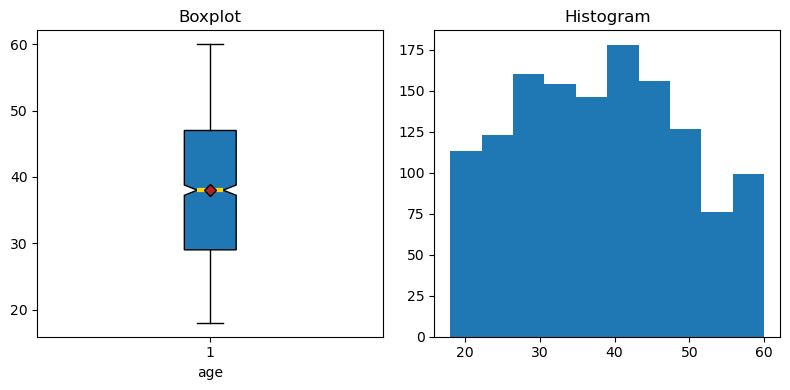

In [18]:
# Call the "explore_numerical_var" function and to explore the age column

explor_numerical_var(df, 'age')

Summary statistics 

len       1332.000000
min          0.000000
max          5.000000
mean         1.099850
median       1.000000
std          1.205958
Name: children, dtype: float64
Missing values: 0


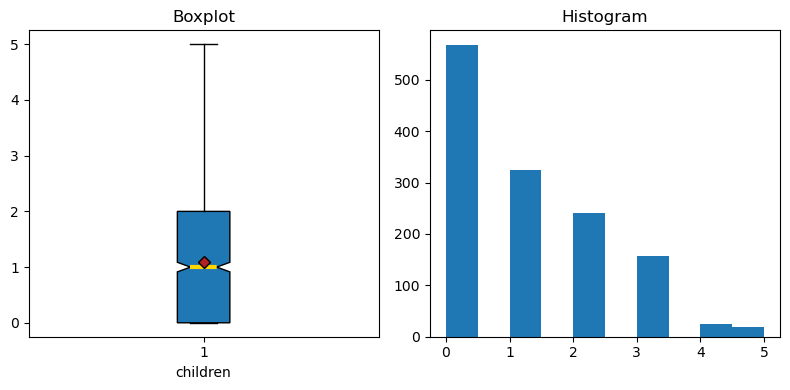

In [19]:
# Call the "explore_numerical_var" function and to explore the  children column

explor_numerical_var(df, 'children')

Summary statistics 

len        1332.000000
min        1121.870000
max       63770.430000
mean      13325.246426
median     9412.965000
std       12109.620712
Name: claim, dtype: float64
Missing values: 0


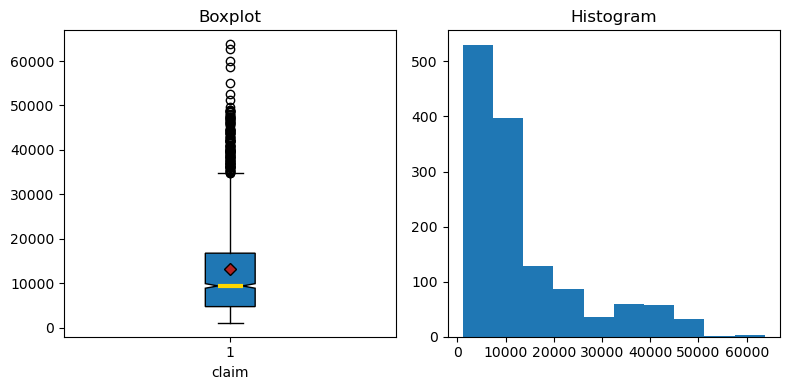

In [20]:
# Call the "explore_numerical_var" function and to explore the target variable claim

explor_numerical_var(df, 'claim')

In [21]:
# Iterate all Categorical Variables in the data
for col in categorical_var.columns:
    print(col)

PatientID
gender
diabetic
smoker
region


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical_var(df, x):
    """Returns the numerical and graphical summary of categorical variables, including percentage of each label"""

    print("Summary")
    print("===============================")
    print(df[x].describe(), "\n")
    print("===============================")
    print("Value count \n")
    value_counts = df[x].value_counts()
    print(value_counts, "\n")
    print("===============================")
    print("Percentage \n")
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100
    print(percentages, "\n")
    print("===============================")
    print(f"Missing values: {df[x].isnull().sum()}")

    plt.figure()
    ax = sns.countplot(data=df, x=x)
    plt.title(x)

    for i, v in enumerate(percentages):
        ax.text(i, v, f"{v:.2f}%", ha='center', va='bottom', fontweight='bold')

    plt.show()


Summary
count     1332
unique       2
top       male
freq       670
Name: gender, dtype: object 

Value count 

male      670
female    662
Name: gender, dtype: int64 

Percentage 

male      50.3003
female    49.6997
Name: gender, dtype: float64 

Missing values: 0


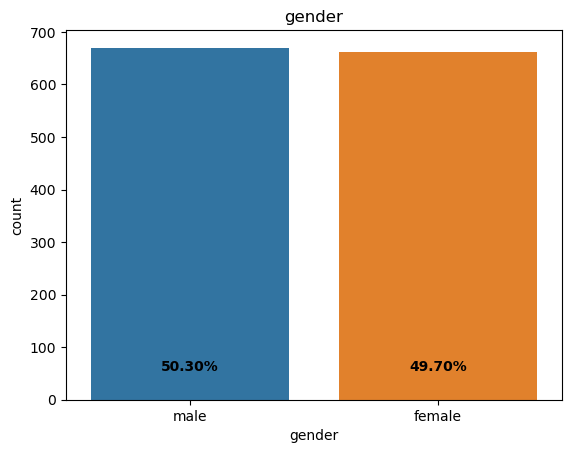

In [23]:
# Call the "explore_categorical_var" function and to explore the gender variable

explore_categorical_var(df, 'gender')

Summary
count     1332
unique       2
top         No
freq       695
Name: diabetic, dtype: object 

Value count 

No     695
Yes    637
Name: diabetic, dtype: int64 

Percentage 

No     52.177177
Yes    47.822823
Name: diabetic, dtype: float64 

Missing values: 0


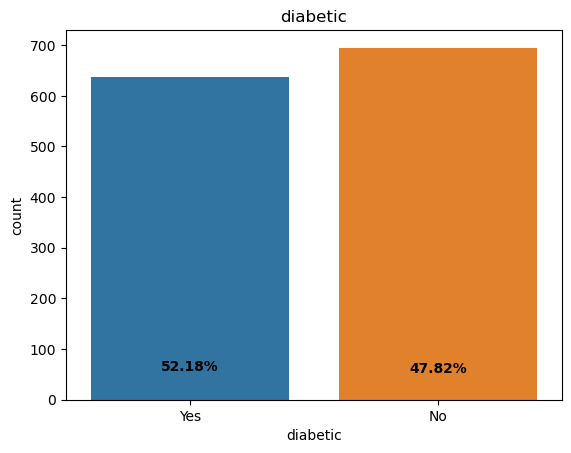

In [24]:
# Call the "explore_categorical_var" function and to explore the diabetic variable

explore_categorical_var(df, 'diabetic')

Summary
count          1332
unique            4
top       southeast
freq            442
Name: region, dtype: object 

Value count 

southeast    442
northwest    345
southwest    314
northeast    231
Name: region, dtype: int64 

Percentage 

southeast    33.183183
northwest    25.900901
southwest    23.573574
northeast    17.342342
Name: region, dtype: float64 

Missing values: 0


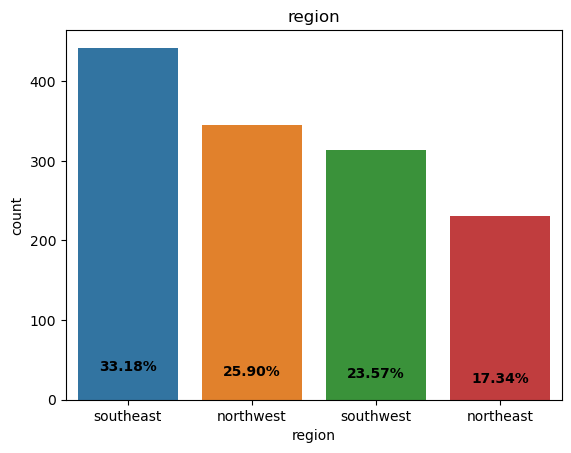

In [25]:
# Call the "explore_categorical_var" function and to explore the region variable

explore_categorical_var(df, 'region')

Summary
count     1332
unique       2
top         No
freq      1058
Name: smoker, dtype: object 

Value count 

No     1058
Yes     274
Name: smoker, dtype: int64 

Percentage 

No     79.429429
Yes    20.570571
Name: smoker, dtype: float64 

Missing values: 0


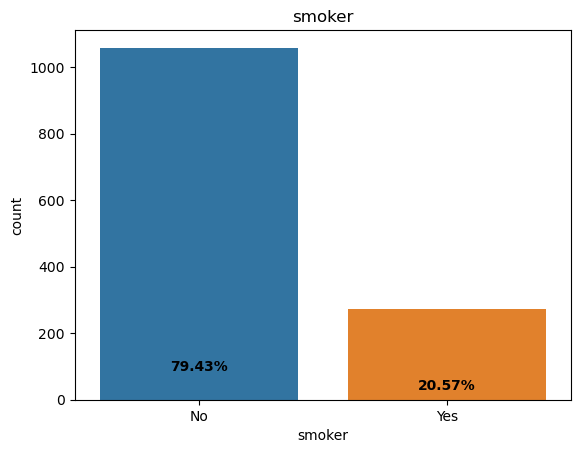

In [26]:
# Call the "explore_categorical_var" function and to explore the diabetic variable

explore_categorical_var(df, 'smoker')

### Bivariate Analysis 

Bivariate analysis is an important statistical technique used to explore the relationship between two variables. It involves examining the association, patterns, and trends between two variables to gain insights into their mutual influence.

The main purpose of conducting bivariate analysis is to understand the relationship between two variables and to determine the strength and direction of their association. By analyzing the relationship between two variables, we can identify patterns, dependencies, and potential cause-effect relationships. This analysis helps us gain a deeper understanding of the data and can provide valuable insights for decision-making and further analysis.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_categorical_numerical(df, categorical_var, numerical_var):
    # Group the data by the categorical variable
    grouped_data = df.groupby(categorical_var)[numerical_var]

    # Create a list of data frames, each containing the numerical values for a category
    data_frames = [grouped_data.get_group(category) for category in df[categorical_var].unique()]

    # Plot a box plot
    plt.boxplot(data_frames, labels=df[categorical_var].unique())
    plt.xlabel(categorical_var)
    plt.ylabel(numerical_var)
    plt.title(f'Comparison of {numerical_var} across {categorical_var}')
    
    # Display the box plot
    plt.show()


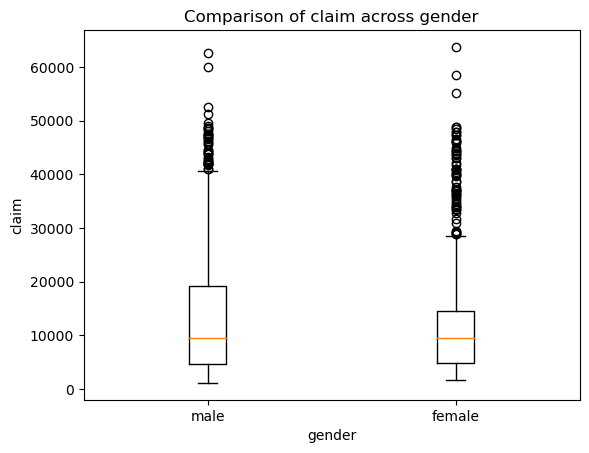

In [28]:
# relationship between gender and claim amount
compare_categorical_numerical(df, 'gender', 'claim')

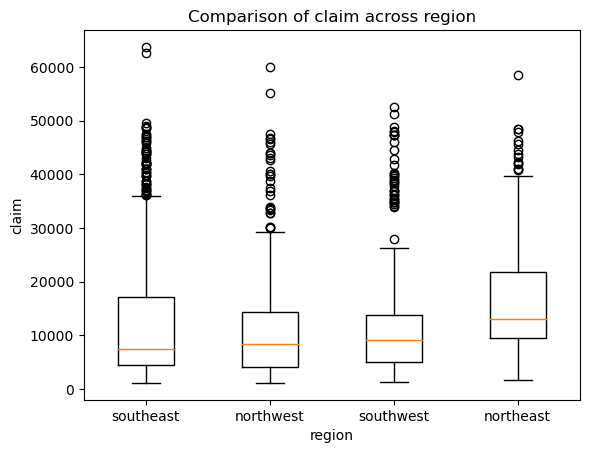

In [29]:
# relationship between region and claim amount
compare_categorical_numerical(df, 'region', 'claim')

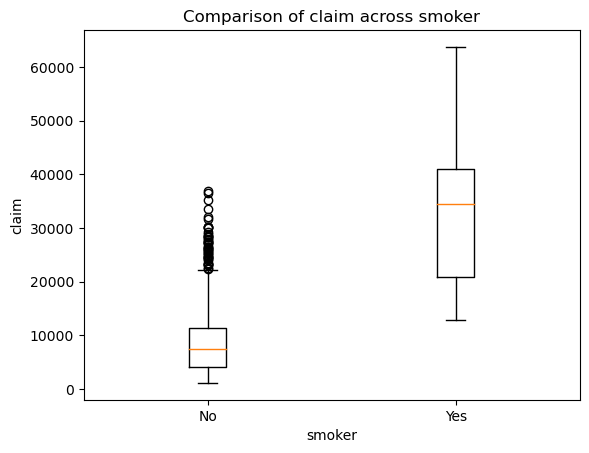

In [30]:
# relationship between being a smoker or not  and claim amount

compare_categorical_numerical(df, 'smoker', 'claim')

From the graph, smokers tends to have a higher insurance claim amount

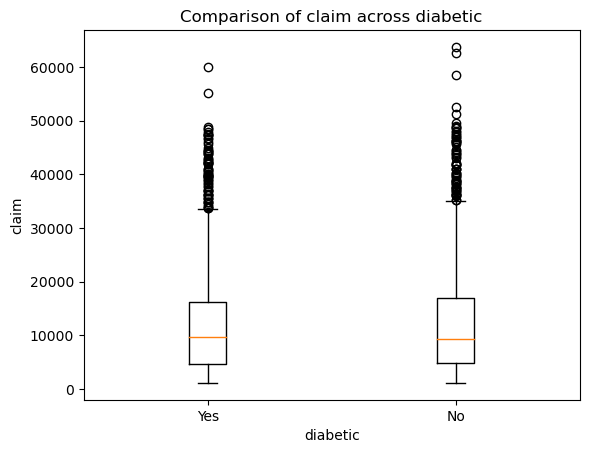

In [31]:
# relationship between being a diabetic patient and claim amount

compare_categorical_numerical(df, 'diabetic', 'claim')

**Exploring Statistical Differences in Insurance Claims**

The objective of this analysis is to determine if there are any significant statistical differences in the insurance claim amounts (charges) among various categorical variables. By conducting a Two-Way ANOVA, we aim to provide valuable insights to the insurance company, specifically tailored to our unique situation. This analysis will help us make informed decisions regarding the factors that influence insurance claims and guide you in developing effective strategies to manage claims effectively.


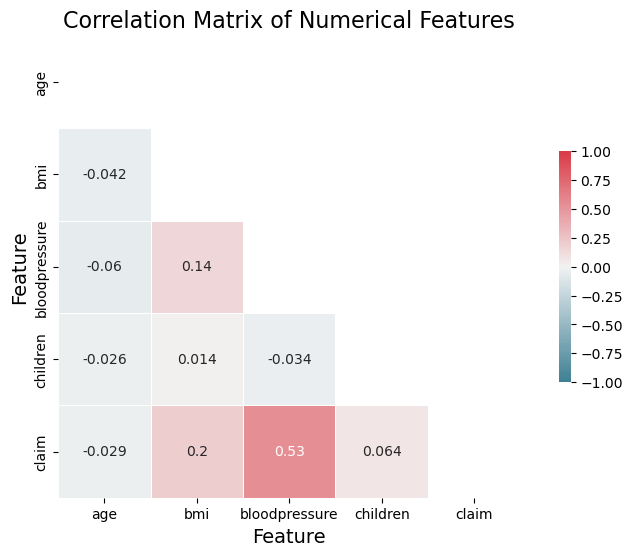

In [32]:
# Set the figure size
plt.figure(figsize = (10, 6))

# Calculate the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the color map to diverging
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add the title and x and y labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

Normality is an important assumption in statistical analysis, including ANOVA. It refers to the distribution of the dependent variable (in this case, insurance claim amounts) following a normal or bell-shaped distribution. When the dependent variable is normally distributed, it allows for more accurate inference and reliable results from statistical tests.

To check for the normality of the dependent variable, we can use visual methods such as a histogram or a Q-Q plot, as well as statistical tests such as the Shapiro-Wilk test or the Kolmogorov-Smirnov test. These methods can provide evidence of whether the data deviate significantly from a normal distribution.

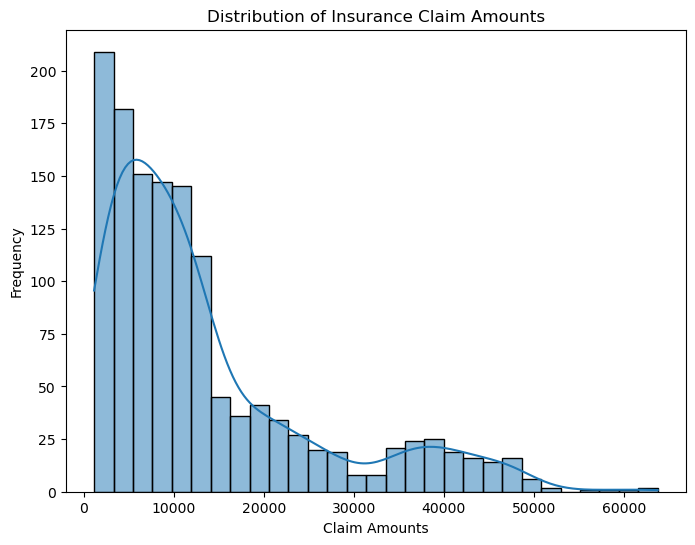

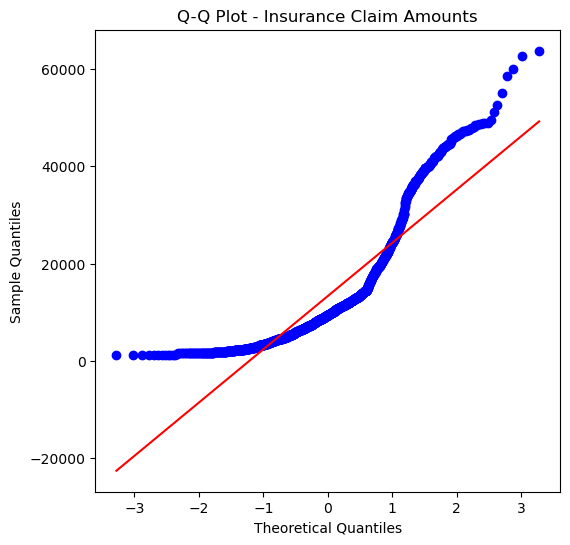

In [33]:
# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='claim', kde=True)
plt.title('Distribution of Insurance Claim Amounts')
plt.xlabel('Claim Amounts')
plt.ylabel('Frequency')
plt.show()

# Create Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['claim'], dist='norm', plot=plt)
plt.title('Q-Q Plot - Insurance Claim Amounts')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


our dependent variable is normal we can proceed

In [34]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df, res_var='claim', anova_model='claim ~ C(gender)+C(smoker)+C(region)+C(diabetic)+C(smoker):C(gender):C(diabetic):C(region)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,4.006726e+02,4.006726e+02,0.000007,9.978164e-01
C(smoker),1.0,1.171649e+11,1.171649e+11,2191.085471,3.843295e-281
C(region),3.0,7.785117e+08,2.595039e+08,4.852948,2.315734e-03
C(diabetic),1.0,1.150277e+08,1.150277e+08,2.151117,1.427080e-01
C(smoker):C(gender):C(diabetic):C(region),25.0,3.845261e+09,1.538104e+08,2.876389,3.125823e-06
Residual,1300.0,6.951549e+10,5.347345e+07,NaN,NaN


**intepreatin of ANOVA Results**

- The gender variable does not have a significant impact on the claim amount. The p-value is very high (close to 1), indicating that gender is not a significant factor.

- The smoker variable has a significant impact on the claim amount. The p-value is very close to zero (3.843295e-281), indicating a strong relationship. The sum_sq and mean_sq values are also quite large, suggesting that being a smoker is an important determinant of the claim amount.

- The region variable has a significant impact on the claim amount. The p-value is below the conventional significance level of 0.05 (2.315734e-03), indicating a statistically significant relationship. The sum_sq and mean_sq values suggest that the region variable explains a considerable amount of the variance in the claim amount.

- The diabetic variable does not have a significant impact on the claim amount. The p-value is relatively high (1.427080e-01), suggesting that being diabetic does not significantly affect the claim amount.

- This interaction term between smoker, gender, diabetic, and region has a significant impact on the claim amount. The p-value is close to zero (3.125823e-06), indicating a strong relationship. The sum_sq and mean_sq values indicate that this interaction term explains a substantial amount of the variance in the claim amount beyond the individual effects of each variable.

Based on these results, being a smoker and the region in which a person resides appear to have the most significant impact on the claim amount. Gender and being diabetic do not show significant effects individually, but their interaction with smoker and region collectively has a significant impact on the claim amount.

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          6.30e-103
Time:                        10:40:24   Log-Likelihood:                -14171.
No. Observations:                1332   AIC:                         2.835e+04
Df Residuals:                    1327   BIC:                         2.838e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -4.7e+04   2795.730    -16.812

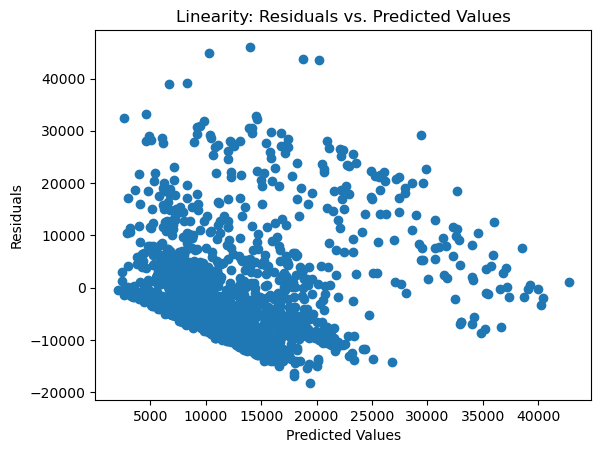

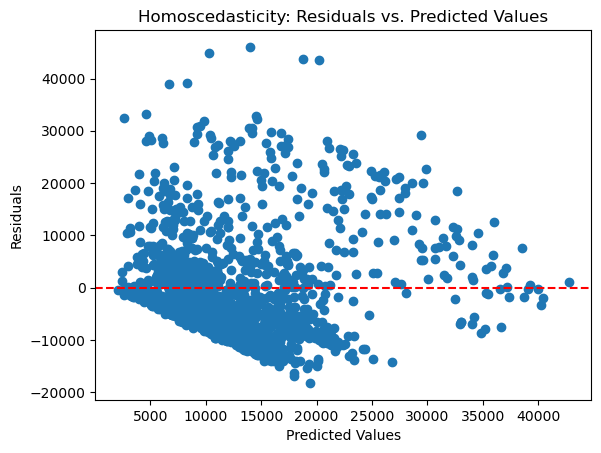

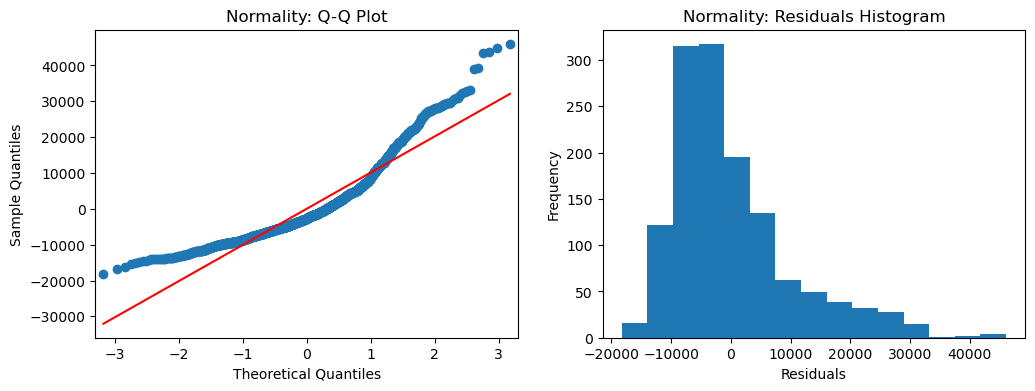

        Variable        VIF
0            age  10.708689
1            bmi  22.578528
2       children   1.809031
3  bloodpressure  27.937914


In [35]:
import statsmodels.api as sm

# Specify the predictor variables (X) and the target variable (y)
X = df[['age', 'bmi', 'children', 'bloodpressure']]
y = df['claim']

# Apply square root transformation to the variable
# X_transformed = np.sqrt(X)

# Add a constant term to the predictor variables
X_regr = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_regr)
results = model.fit()

# Print the regression summary
print(results.summary())


# Residuals
residuals = results.resid

# Check for linearity using a scatter plot of predicted values vs. residuals
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Residuals vs. Predicted Values')
plt.show()

# Check for homoscedasticity using a plot of residuals vs. predicted values
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Check for normality using a histogram and Q-Q plot of the residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title('Normality: Q-Q Plot')
ax[1].hist(residuals, bins=15)
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Normality: Residuals Histogram')
plt.show()

# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

The OLS regression results indicate that the model has a low R-squared value of 0.304, which means that only 30.40% of the variation in the dependent variable (charges) is explained by the independent variables (age, BMI, and children). The adjusted R-squared value is also 0.302, suggesting that the inclusion of additional independent variables did not improve the model's explanatory power.

**Intepretation of Coefficients**

- Age: The coefficient for age is 10.7620. This suggests that, on average, for every one-year increase in age, the insurance claim is expected to increase by $10.7620, assuming all other variables remain constant. But since the p value (0.667) is grater than 0.05, age is not significant

- BMI (Body Mass Index): The coefficient for BMI is 246.1194. This indicates that, on average, for every one-unit increase in BMI, the insurance claim is expected to increase by $246.1194, assuming all other variables remain constant. This suggests that individuals with higher BMI tend to have higher insurance claims.

- Children: The coefficient for children is 807.8338. This implies that, on average, each additional child is associated with an increase of $807.8338 in the insurance claim, assuming all other variables remain constant. This suggests that individuals with more children tend to have higher insurance claims.

- Blood Pressure: The coefficient for blood pressure is 546.5840. This indicates that, on average, for every one-unit increase in blood pressure, the insurance claim is expected to increase by $546.5840, assuming all other variables remain constant. This suggests that individuals with higher blood pressure levels tend to have higher insurance claims.
- The p-values associated with the coefficients indicate that all independent variables (age, BMI, and children) are statistically significant (p < 0.001), suggesting that these variables have a significant impact on the charges.

The model's F-statistic is 145, and the associated p-value is close to 0, indicating that the overall model is statistically significant, suggesting that at least one of the independent variables is related to the dependent variable.

The standard errors of the coefficients provide information about the precision of the estimates. The 95% confidence intervals for the coefficients (given by [0.025, 0.975]) indicate the range in which the true population values are likely to fall.

The low R-squared value suggests that the current model has limited explanatory power. 

Although age gender, and diabetic status may not be statistically significant in predicting the claim variable based on the p-values, it is important to consider domain knowledge when making modeling decisions. In some cases, domain experts may have insights or prior knowledge suggesting that age plays a significant role in the target variable, regardless of the statistical significance. Their interaction with other variables have is significant. Therefore, including these variables in the training data for modeling can capture potential relationships that may not be apparent from statistical tests alone. By incorporating domain knowledge, we aim to build a more comprehensive and accurate predictive model that accounts for relevant factors beyond statistical significance.

## Modelling 

In the model stage, the dataset is prepared for modeling by transforming variables, splitting it into training and testing sets, and selecting appropriate algorithms or models. The chosen models are then trained on the training set, and their performance is evaluated using suitable evaluation metrics. Model selection and tuning are done to optimize predictive accuracy.


### Data Preprocessing 

**Encoding Categorical Variables**

When working with categorical variables in machine learning models, they need to be encoded into numerical format because most machine learning algorithms require numerical input.

We use one-hot encoding for categorical variables because it allows us to represent categorical information without introducing any ordinal relationship or numerical bias. It ensures that each category is treated as a separate and independent feature, preventing the model from assigning any numerical order or magnitude to the categories.

By using one-hot encoding, we create a binary representation of categorical variables that can be readily understood by machine learning algorithms. This encoding scheme enables the algorithms to effectively learn from and make predictions based on categorical information.

one-hot encoding is used to transform categorical variables into a format that can be processed by machine learning algorithms. It preserves the categorical nature of the variables while enabling meaningful analysis and prediction in the models.


In [36]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical variable
cat_col = df[['gender', 'diabetic', 'region', 'smoker']]

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Encode the categorical variables using one-hot encoding
X_encoded = onehot_encoder.fit_transform(cat_col)

# Get the encoded feature names
encoded_feature_names = onehot_encoder.get_feature_names_out(cat_col.columns)

# Convert the encoded matrix to a dense numpy array
X_encoded_array = X_encoded.toarray()

**Data Scaling with Standard Scaler**

Data scaling is a crucial step in data preprocessing that aims to transform numerical features to a standardized scale. It involves adjusting the values of the features to comparable ranges to prevent certain variables from dominating others during modeling.

One popular scaling technique is the StandardScaler. It applies a transformation to the data such that the resulting distribution has a mean of 0 and a standard deviation of 1. This scaling method is beneficial for several reasons.

Firstly, it helps to address the issue of different measurement scales. Variables with larger scales can have a disproportionate influence on the modeling process, leading to biased results. StandardScaler equalizes the scales, allowing for fair comparisons and ensuring that no single feature dominates the others.

Secondly, many machine learning algorithms assume that the features are normally distributed or have a similar distribution. StandardScaler transforms the data to have a Gaussian distribution, which can improve the performance of certain algorithms.

Additionally, StandardScaler is robust to outliers. By centering the data around zero and rescaling it using the standard deviation, it diminishes the impact of outliers, making the model more resilient to extreme values.

 StandardScaler is a widely used scaling technique that standardizes the numerical features by centering them around zero and scaling them using the standard deviation. It ensures fair comparisons between features, improves algorithm performance, and provides robustness to outliers.

In [37]:
from sklearn.preprocessing import StandardScaler
# Select the numerical variables
numerical_features = df.drop(columns=['gender', 'diabetic', 'smoker', 'region', 'PatientID', 'claim'])

# Standardize the numerical data
scaler = StandardScaler()
X_std = scaler.fit_transform(numerical_features)

# Combine the encoded variables and the standardized numerical variables
X_concat = np.concatenate((X_encoded_array, X_std), axis=1)

# Create a DataFrame with the concatenated data and original column names
X_df = pd.DataFrame(X_concat, columns=np.concatenate((encoded_feature_names, numerical_features.columns)))


In [38]:
X_df.head()

,gender_female,gender_male,diabetic_No,diabetic_Yes,region_northeast,region_northwest,region_southeast,region_southwest,smoker_No,smoker_Yes,age,bmi,bloodpressure,children
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.082248,-1.219345,-0.278754,-0.912356
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.268053,-0.091281,-0.628378,-0.912356
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.718154,1.707084,0.507899,-0.912356
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.628134,2.017710,-0.715783,-0.912356
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.727933,3.668936,0.245681,-0.912356


In [39]:
# Selecting the independent variables
features = pd.DataFrame(X_df)
X = features[:]

# Selecting the dependent variable
y = df['claim']

# Printing the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Confirming the variable types
print("Type of X:", type(X))
print("Type of y:", type(y))

Shape of X: (1332, 14)
Shape of y: (1332,)
Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>


**Splitting Data into Train and Test**

Splitting the data into training and testing sets is a crucial step in machine learning and predictive modeling. The purpose of this step is to assess the performance and generalization ability of the model on unseen data.

In [40]:
from sklearn.model_selection import train_test_split

# Split the training set into a smaller training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LazyPredict**

Lazy Predict provides a quick and convenient way to evaluate multiple machine learning models without explicitly specifying or fine-tuning each model individually. It aims to automate the model selection process by providing a simple interface to train and test a wide range of models and generate performance metrics

But performance results provided by Lazy Predict are preliminary and may not represent the best performance achievable by each model. Fine-tuning and optimizing individual models may be required for achieving optimal results

In [41]:
#using the lazy predict to get 
from lazypredict.Supervised import LazyRegressor
##getting an overview for the performance for each of the regression algorithms
reg = LazyRegressor(verbose = True, ignore_warnings = True, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  5%|▍         | 2/42 [00:00<00:02, 14.80it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7959187087988493, 'Adjusted R-Squared': 0.7845808592876742, 'RMSE': 5423.543216267642, 'Time taken': 0.05984044075012207}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8026791082207152, 'Adjusted R-Squared': 0.7917168364551994, 'RMSE': 5332.9565240401, 'Time taken': 0.07532024383544922}
{'Model': 'BayesianRidge', 'R-Squared': 0.7300866500809111, 'Adjusted R-Squared': 0.7150914639742951, 'RMSE': 6237.257746328657, 'Time taken': 0.02193284034729004}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6355836332747147, 'Adjusted R-Squared': 0.6153382795677544, 'RMSE': 7247.370190387776, 'Time taken': 0.020943164825439453}
{'Model': 'DummyRegressor', 'R-Squared': -2.685279862491008e-05, 'Adjusted R-Squared': -0.055583900176326306, 'RMSE': 12005.69591957428, 'Time taken': 0.010972023010253906}
{'Model': 'ElasticNet', 'R-Squared': 0.695212490780521, 'Adjusted R-Squared': 0.6782798513794388, 'RMSE': 6627.9632360676305, 'Time taken': 0.011481761932373

 17%|█▋        | 7/42 [00:00<00:01, 24.65it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2404360130564046, 'Adjusted R-Squared': 0.19823801378176042, 'RMSE': 10463.179867405597, 'Time taken': 0.09973478317260742}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6178314404888625, 'Adjusted R-Squared': 0.5965998538493549, 'RMSE': 7421.795542020554, 'Time taken': 0.029921770095825195}


 24%|██▍       | 10/42 [00:00<00:02, 10.90it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.801017779189051, 'Adjusted R-Squared': 0.7899632113662205, 'RMSE': 5355.359689032915, 'Time taken': 0.45859241485595703}
{'Model': 'GammaRegressor', 'R-Squared': 0.610050552343989, 'Adjusted R-Squared': 0.5883866941408773, 'RMSE': 7496.968104603971, 'Time taken': 0.014961719512939453}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7659894305033872, 'Adjusted R-Squared': -0.8640999544202421, 'RMSE': 15954.21933733666, 'Time taken': 0.11868166923522949}


 29%|██▊       | 12/42 [00:01<00:03,  8.44it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.837761831784578, 'Adjusted R-Squared': 0.8287486002170545, 'RMSE': 4835.685252177041, 'Time taken': 0.25776219367980957}


 38%|███▊      | 16/42 [00:02<00:05,  4.39it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8156352925212688, 'Adjusted R-Squared': 0.8053928087724503, 'RMSE': 5154.901874498186, 'Time taken': 1.479071855545044}
{'Model': 'HuberRegressor', 'R-Squared': 0.7198471554984988, 'Adjusted R-Squared': 0.7042831085817487, 'RMSE': 6354.4655066867435, 'Time taken': 0.030916213989257812}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7012960775297921, 'Adjusted R-Squared': 0.6847014151703361, 'RMSE': 6561.482445014409, 'Time taken': 0.03542017936706543}
{'Model': 'KernelRidge', 'R-Squared': -0.5827833106599953, 'Adjusted R-Squared': -0.6707157168077729, 'RMSE': 15104.009132756233, 'Time taken': 0.06620955467224121}
{'Model': 'Lars', 'R-Squared': 0.7299989045331023, 'Adjusted R-Squared': 0.7149988436738303, 'RMSE': 6238.271492269174, 'Time taken': 0.02294182777404785}
{'Model': 'LarsCV', 'R-Squared': 0.7285094905956555, 'Adjusted R-Squared': 0.7134266845176364, 'RMSE': 6255.453996949883, 'Time taken': 0.04389142990112305}


 48%|████▊     | 20/42 [00:02<00:03,  6.80it/s]

{'Model': 'Lasso', 'R-Squared': 0.7303106211201004, 'Adjusted R-Squared': 0.7153278778489949, 'RMSE': 6234.669406373808, 'Time taken': 0.014966487884521484}
{'Model': 'LassoCV', 'R-Squared': 0.7272628814172326, 'Adjusted R-Squared': 0.7121108192737455, 'RMSE': 6269.799204066162, 'Time taken': 0.11170625686645508}
{'Model': 'LassoLars', 'R-Squared': 0.7298413449684069, 'Adjusted R-Squared': 0.714832530799985, 'RMSE': 6240.091403384319, 'Time taken': 0.019949674606323242}
{'Model': 'LassoLarsCV', 'R-Squared': 0.7285094905956555, 'Adjusted R-Squared': 0.7134266845176364, 'RMSE': 6255.453996949883, 'Time taken': 0.029916048049926758}
{'Model': 'LassoLarsIC', 'R-Squared': 0.729836433139299, 'Adjusted R-Squared': 0.7148273460914822, 'RMSE': 6240.148129538943, 'Time taken': 0.014959335327148438}
{'Model': 'LinearRegression', 'R-Squared': 0.7303130998448943, 'Adjusted R-Squared': 0.7153304942807218, 'RMSE': 6234.640754772447, 'Time taken': 0.011970281600952148}
{'Model': 'LinearSVR', 'R-Square

 67%|██████▋   | 28/42 [00:04<00:02,  5.92it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.0490197617340047, 'Adjusted R-Squared': -1.1628541929414493, 'RMSE': 17185.19964804943, 'Time taken': 1.3904263973236084}
{'Model': 'NuSVR', 'R-Squared': -0.03886580732577993, 'Adjusted R-Squared': -0.09658057439943435, 'RMSE': 12236.61326795866, 'Time taken': 0.08976078033447266}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6240386889693366, 'Adjusted R-Squared': 0.603151949467633, 'RMSE': 7361.275743077503, 'Time taken': 0.010764598846435547}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7301859166165494, 'Adjusted R-Squared': 0.7151962453174688, 'RMSE': 6236.110696904103, 'Time taken': 0.019731521606445312}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7193040546966255, 'Adjusted R-Squared': 0.7037098355131046, 'RMSE': 6360.621868163811, 'Time taken': 0.015918731689453125}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7422083523805698, 'Adjusted R-Squared': 0.7278865941794903, 'RMSE': 6095.592548998353, 'Time taken

 79%|███████▊  | 33/42 [00:38<00:24,  2.75s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.104951983885891, 'Adjusted R-Squared': -0.166338205212885, 'RMSE': 12619.821479617614, 'Time taken': 33.67444372177124}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6518141126858492, 'Adjusted R-Squared': 0.6324704522795075, 'RMSE': 7084.139269705852, 'Time taken': 0.13016557693481445}


 83%|████████▎ | 35/42 [00:39<00:15,  2.16s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8144018042421338, 'Adjusted R-Squared': 0.8040907933666968, 'RMSE': 5172.11750971136, 'Time taken': 0.6253767013549805}
{'Model': 'Ridge', 'R-Squared': 0.7302900724421173, 'Adjusted R-Squared': 0.7153061875777904, 'RMSE': 6234.906923650551, 'Time taken': 0.010970354080200195}
{'Model': 'RidgeCV', 'R-Squared': 0.7300707041986372, 'Adjusted R-Squared': 0.7150746322096726, 'RMSE': 6237.44198528694, 'Time taken': 0.017955780029296875}
{'Model': 'SGDRegressor', 'R-Squared': 0.7295316743329322, 'Adjusted R-Squared': 0.7145056562403174, 'RMSE': 6243.666746249569, 'Time taken': 0.026924610137939453}


 90%|█████████ | 38/42 [00:39<00:05,  1.45s/it]

{'Model': 'SVR', 'R-Squared': -0.0997416292364286, 'Adjusted R-Squared': -0.16083838641623016, 'RMSE': 12590.032201650354, 'Time taken': 0.2193291187286377}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7303130998448943, 'Adjusted R-Squared': 0.7153304942807218, 'RMSE': 6234.640754772447, 'Time taken': 0.01894974708557129}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6444097353016321, 'Adjusted R-Squared': 0.6246547205961672, 'RMSE': 7159.067209641754, 'Time taken': 0.0249326229095459}


100%|██████████| 42/42 [00:39<00:00,  1.06it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.7968225534821176, 'Adjusted R-Squared': 0.7855349175644575, 'RMSE': 5411.519869295807, 'Time taken': 0.19880175590515137}
{'Model': 'LGBMRegressor', 'R-Squared': 0.8159465903814099, 'Adjusted R-Squared': 0.8057214009581549, 'RMSE': 5150.548037201607, 'Time taken': 0.1636369228363037}


In [42]:
#performace for each model
pd.DataFrame(models)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.83,0.84,4835.69,0.26
LGBMRegressor,0.81,0.82,5150.55,0.16
HistGradientBoostingRegressor,0.81,0.82,5154.90,1.48
RandomForestRegressor,0.80,0.81,5172.12,0.63
BaggingRegressor,0.79,0.80,5332.96,0.08
ExtraTreesRegressor,0.79,0.80,5355.36,0.46
XGBRegressor,0.79,0.80,5411.52,0.20
AdaBoostRegressor,0.78,0.80,5423.54,0.06
PoissonRegressor,0.73,0.74,6095.59,0.02


When fitting multiple models to a dataset, it is common practice to evaluate and compare their performance to select the best model as the final choice. In this approach, we train and evaluate each model individually, without relying on automated model selection techniques like "Lazy Predict."

By fitting models manually, we have more control over the training process and can fine-tune the hyperparameters and other settings specific to each model. We then evaluate the models using appropriate evaluation metrics, such as mean squared error (MSE), R-squared, or other relevant metrics based on the problem at hand.

After evaluating the models, we can compare their performance and select the one that achieves the best results according to the evaluation metrics. This approach allows us to make an informed decision on the final model that is most suitable for the given dataset and problem.

**Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Squared Error (MSE): 38870745.34106953
R-squared: 0.7303130998448946


**Gradient Boosting**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Gradient Boosting model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbr = gbr.predict(X_test)
# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Performance:")
print("Mean Squared Error:", mse_gbr)
print("R-squared:", r2_gbr)

Gradient Boosting Performance:
Mean Squared Error: 23405312.959664494
R-squared: 0.8376129337406125


**XGBoost Regressor**

In [45]:
from xgboost import XGBRegressor

# Fit the XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate the models
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Performance:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)


XGBoost Performance:
Mean Squared Error: 29093733.3320952
R-squared: 0.7981464289550941


**Deep Learning Approach with TensorFlow and Keras**

Deep learning allows us to model complex patterns and relationships in the data, which can be beneficial for predicting insurance claims accurately.
The use of neural networks with multiple layers and non-linear activation functions helps capture intricate patterns that may not be captured by traditional regression models.
Deep learning has the ability to handle both numerical and categorical features, eliminating the need for extensive preprocessing and encoding.
it can potentially learn more nuanced patterns and make more accurate predictions.
Deep learning models, with proper tuning and optimization, have the potential to outperform other traditional regression algorithms, providing better predictive power for insurance claim estimation.

In [46]:
import tensorflow as tf
from tensorflow import keras

# Get the shape of the input data
input_shape = X_df.shape[1]

# Create the sequential model
dl_model = keras.Sequential()

# Add layers to the model
dl_model.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
dl_model.add(keras.layers.Dense(64, activation='relu'))
dl_model.add(keras.layers.Dense(1))  # Output layer with single neuron

# Compile the model
dl_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
dl_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss = dl_model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)



Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 324986080.0000 - val_loss: 320267360.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 324797216.0000 - val_loss: 319916192.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 324172832.0000 - val_loss: 318876736.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 322526144.0000 - val_loss: 316468992.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 319172608.0000 - val_loss: 312013024.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 313365536.0000 - val_loss: 304946624.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 304875360.0000 - val_loss: 294971168.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 293230848.0000 - val_loss: 281941632.0000
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 2785912

34/34 [==============================] - 0s 3ms/step - loss: 47527272.0000 - val_loss: 42649444.0000
Epoch 73/100
34/34 [==============================] - 0s 3ms/step - loss: 47248132.0000 - val_loss: 42272192.0000
Epoch 74/100
34/34 [==============================] - 0s 4ms/step - loss: 47027736.0000 - val_loss: 42167648.0000
Epoch 75/100
34/34 [==============================] - 0s 4ms/step - loss: 46741936.0000 - val_loss: 41822548.0000
Epoch 76/100
34/34 [==============================] - 0s 3ms/step - loss: 46473260.0000 - val_loss: 41459000.0000
Epoch 77/100
34/34 [==============================] - 0s 3ms/step - loss: 46241116.0000 - val_loss: 41167184.0000
Epoch 78/100
34/34 [==============================] - 0s 4ms/step - loss: 46033636.0000 - val_loss: 40990784.0000
Epoch 79/100
34/34 [==============================] - 0s 4ms/step - loss: 45869480.0000 - val_loss: 40734736.0000
Epoch 80/100
34/34 [==============================] - 0s 3ms/step - loss: 45686608.0000 - val_loss: 4

Based on the performance metrics, Gradient Boosting appears to be a strong candidate for our final model selection. 

Mean Squared Error (MSE): The MSE value of 23,405,312.96 indicates that the average squared difference between the predicted and actual values is relatively low. Lower MSE values suggest that the model has better accuracy in predicting the insurance claim.

R-squared: The R-squared value of 0.8376 indicates that approximately 83.76% of the variance in the dependent variable (insurance claim) can be explained by the independent variables used in the model. Higher R-squared values indicate a better fit of the model to the data.

The gradient boosting model has a lower Mean Squared Error (MSE) compared to the deep learning model and the other models, it indicates that the gradient boosting model is performing better in terms of minimizing the prediction errors. Therefore, we are selecting the gradient boosting model as the final model

**Hyperparameter Tuning the gradient Boosting Model**

Hyperparameter tuning allows us to find the optimal combination of hyperparameters for a given algorithm. Hyperparameters are parameters that are set prior to training the model and cannot be learned from the data. hyperparameter tuning allows us to fine-tune the model, improving its performance, generalization capabilities, and robustness, leading to better predictions and more reliable machine learning models.

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of each decision tree
    'min_samples_split': [2, 4, 6]  # Minimum number of samples required to split an internal node
}

# Create an instance of the Gradient Boosting regressor
final_model = GradientBoostingRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(final_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100}
Best MSE Score: 28943578.59606595


In [48]:
# Initialize the Gradient Boosting Regressor with the best hyperparameters
final_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, min_samples_split=6, n_estimators=100)

# Fit the model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23427124.823301487
R-squared: 0.8374616020941712


# iNteprete

Here we analyze the coefficients or feature importance of the chosen model to understand the impact of different variables on claim amounts. Interpret the model's predictions, identifying the demographic and contextual factors that significantly influence claim amounts. Validate the model's interpretations through domain knowledge and consultation with subject matter experts.

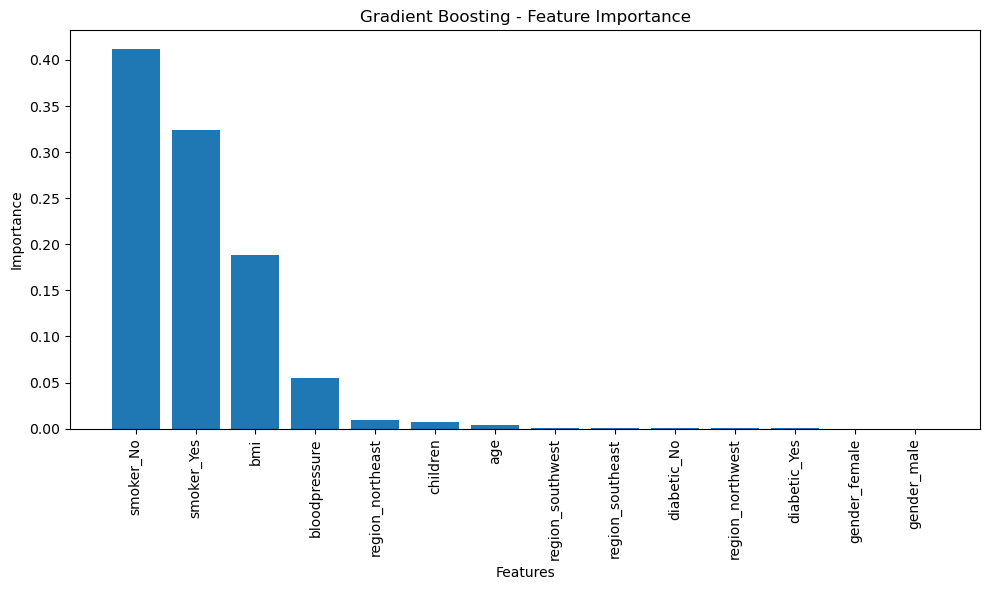

In [49]:
# Get feature importances from the model
feature_importance = final_model.feature_importances_

# Get the names of the features
feature_names = X_df.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names accordingly
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.tight_layout()
plt.show()


**Intepretation of the Feature Importance**

- 'smoker': This variable has the highest importance, indicating that whether a person is a smoker or not is a strong predictor of the insurance claim. Being a smoker may lead to higher insurance claims.

- 'bmi': The body mass index (BMI) is an important factor in predicting the insurance claim. Higher BMI values may be correlated with higher claims, as obesity-related health conditions can contribute to increased medical expenses.

- 'bloodpressure': Blood pressure measurements have some predictive power for the insurance claim. Abnormal blood pressure levels may be indicative of underlying health conditions that impact the claim.

- The other variables has little significance on predicting the claim amount 

These rankings indicate the relative importance of the variables in predicting the insurance claim based on the gradient boosting model. However, the importance does not imply causation, and the interpretation should be considered within the context of the model and our specific task at hand

## Conclusion 
In this insurance claim prediction project, I followed the OSEMN (Obtain, Scrub, Explore, Model, and iNterpret) framework to analyze the dataset and build a predictive model.

First, I obtained the dataset and performed data scrubbing by handling missing values, checking for data integrity, and transforming variables if necessary.

Next, I explored the data through descriptive statistics and visualizations to gain insights into the distributions, correlations, and patterns within the dataset. This helped me understand the relationships between variables and identify potential predictors of the insurance claim.

For modeling, I preprocessed the data by encoding categorical variables using the one-hot encoder and standardizing numerical variables using the StandardScaler. This ensured that all variables were in a suitable format for the models.

I employed various regression algorithms, starting with linear regression and then exploring more advanced techniques like gradient boosting and XGBoost. I evaluated each model using appropriate metrics such as mean squared error (MSE) and R-squared, selecting the best-performing model for further analysis.

After selecting the gradient boosting model as the best performer, I performed hyperparameter tuning to optimize its performance further. This involved systematically exploring different combinations of hyperparameters using techniques like GridSearchCV.

Throughout the project, I interpreted the results and made informed decisions based on statistical significance, domain knowledge, and evaluation metrics. Based on the results, being a smoker and the region in which a person resides appear to have the most significant impact on the claim amount. Gender and being diabetic do not show significant effects individually, but their interaction with smoker and region collectively has a significant impact on the claim amount.

In the end, I achieved a well-performing model with a low MSE, indicating good predictive capability for the insurance claim. I also provided interpretations for the importance of variables and their impact on the claim amount.

This project involved data preprocessing, exploratory data analysis, model building, evaluation, and interpretation. It aimed to understand the factors influencing insurance claims and develop a reliable predictive model for future claim estimation.

In [50]:
final_model.predict([[0.0, 1.0, 0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.082248,-1.219345,-0.278754,-0.912356]])

array([6279.3911862])